In [3]:
df = np.loadtxt('dfLocalityReward.csv', delimiter=',', dtype=np.float32, skiprows=1)


In [19]:
from PIL import Image

In [36]:
hi = df[:-50, 1:].reshape(-1,41,41).astype(np.uint8)*255

In [37]:
hi[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
arrs = df[:-50, 1:].reshape(-1, 41, 41)
ims = [Image.fromarray(np.uint8(im*255)) for im in arrs]

In [14]:
Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))

NameError: name 'Image' is not defined

In [5]:
df.shape

(350, 1682)

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


class OrganoidDataset(Dataset):

    def __init__(self, transform=None, train=None):
        df = np.loadtxt('dfLocalityReward.csv', delimiter=',', dtype=np.float32, skiprows=1)
        
        if train == True:
            self.n_samples = df[:-50, :].shape[0]

            self.x_data = df[:-50, 1:]
            self.y_data = df[:-50, [0]]
        else:
            self.n_samples = df[-50:, :].shape[0]

            self.x_data = df[-50:, 1:]
            self.y_data = df[-50:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [20]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 1681 # 41x41
output_size = 1
num_epochs = 1000
batch_size = 70
learning_rate = 0.001

trainData = OrganoidDataset(transform=ToTensor(), train=True)
testData = OrganoidDataset(transform=ToTensor(), train=False)

train_loader = DataLoader(dataset=trainData,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2)

test_loader = DataLoader(dataset=testData,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.relu = nn.ReLU()
        self.l1 = nn.Linear(input_size, 128)
        self.l2 = nn.Linear(128, 64)
        self.l3 = nn.Linear(64, output_size)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        return out

model = NeuralNet(input_size, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        
        images = images.to(device) #.reshape(-1, input_size) if necessary
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 5 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device) # .reshape(-1, input_size) if necessary
        labels = labels.to(device)
        outputs = model(images)

Epoch [1/1000], Step [5/5], Loss: 14040.8516
Epoch [2/1000], Step [5/5], Loss: 7678.8281
Epoch [3/1000], Step [5/5], Loss: 8149.9175
Epoch [4/1000], Step [5/5], Loss: 10734.2314
Epoch [5/1000], Step [5/5], Loss: 12187.6396
Epoch [6/1000], Step [5/5], Loss: 1258.4846
Epoch [7/1000], Step [5/5], Loss: 12178.0410
Epoch [8/1000], Step [5/5], Loss: 4067.6426
Epoch [9/1000], Step [5/5], Loss: 9706.5176
Epoch [10/1000], Step [5/5], Loss: 12704.4004
Epoch [11/1000], Step [5/5], Loss: 5838.4312
Epoch [12/1000], Step [5/5], Loss: 5116.2358
Epoch [13/1000], Step [5/5], Loss: 9076.3643
Epoch [14/1000], Step [5/5], Loss: 13369.6582
Epoch [15/1000], Step [5/5], Loss: 10426.1494
Epoch [16/1000], Step [5/5], Loss: 7164.3267
Epoch [17/1000], Step [5/5], Loss: 5505.8296
Epoch [18/1000], Step [5/5], Loss: 9950.5469
Epoch [19/1000], Step [5/5], Loss: 10585.9639
Epoch [20/1000], Step [5/5], Loss: 7648.8594
Epoch [21/1000], Step [5/5], Loss: 7045.8394
Epoch [22/1000], Step [5/5], Loss: 5279.7339
Epoch [23/1

Epoch [183/1000], Step [5/5], Loss: 873.5549
Epoch [184/1000], Step [5/5], Loss: 1933.0703
Epoch [185/1000], Step [5/5], Loss: 1437.5269
Epoch [186/1000], Step [5/5], Loss: 1361.5382
Epoch [187/1000], Step [5/5], Loss: 1422.0920
Epoch [188/1000], Step [5/5], Loss: 1470.4661
Epoch [189/1000], Step [5/5], Loss: 926.1896
Epoch [190/1000], Step [5/5], Loss: 1328.9409
Epoch [191/1000], Step [5/5], Loss: 1134.8820
Epoch [192/1000], Step [5/5], Loss: 1132.5549
Epoch [193/1000], Step [5/5], Loss: 508.5628
Epoch [194/1000], Step [5/5], Loss: 1064.2686
Epoch [195/1000], Step [5/5], Loss: 784.7097
Epoch [196/1000], Step [5/5], Loss: 788.7773
Epoch [197/1000], Step [5/5], Loss: 1351.4169
Epoch [198/1000], Step [5/5], Loss: 1282.9727
Epoch [199/1000], Step [5/5], Loss: 1257.1340
Epoch [200/1000], Step [5/5], Loss: 1453.8030
Epoch [201/1000], Step [5/5], Loss: 844.6466
Epoch [202/1000], Step [5/5], Loss: 1085.1299
Epoch [203/1000], Step [5/5], Loss: 1816.0944
Epoch [204/1000], Step [5/5], Loss: 1047

Epoch [364/1000], Step [5/5], Loss: 331.7401
Epoch [365/1000], Step [5/5], Loss: 610.4005
Epoch [366/1000], Step [5/5], Loss: 349.8838
Epoch [367/1000], Step [5/5], Loss: 569.1276
Epoch [368/1000], Step [5/5], Loss: 981.9526
Epoch [369/1000], Step [5/5], Loss: 840.0546
Epoch [370/1000], Step [5/5], Loss: 519.6790
Epoch [371/1000], Step [5/5], Loss: 699.8000
Epoch [372/1000], Step [5/5], Loss: 457.7345
Epoch [373/1000], Step [5/5], Loss: 715.0747
Epoch [374/1000], Step [5/5], Loss: 463.5980
Epoch [375/1000], Step [5/5], Loss: 785.8864
Epoch [376/1000], Step [5/5], Loss: 808.4622
Epoch [377/1000], Step [5/5], Loss: 435.2079
Epoch [378/1000], Step [5/5], Loss: 517.1602
Epoch [379/1000], Step [5/5], Loss: 442.4743
Epoch [380/1000], Step [5/5], Loss: 829.2332
Epoch [381/1000], Step [5/5], Loss: 655.2234
Epoch [382/1000], Step [5/5], Loss: 429.9198
Epoch [383/1000], Step [5/5], Loss: 1001.5701
Epoch [384/1000], Step [5/5], Loss: 860.8162
Epoch [385/1000], Step [5/5], Loss: 526.8915
Epoch [38

Epoch [546/1000], Step [5/5], Loss: 441.7559
Epoch [547/1000], Step [5/5], Loss: 302.2235
Epoch [548/1000], Step [5/5], Loss: 517.2110
Epoch [549/1000], Step [5/5], Loss: 629.2495
Epoch [550/1000], Step [5/5], Loss: 258.9525
Epoch [551/1000], Step [5/5], Loss: 281.7419
Epoch [552/1000], Step [5/5], Loss: 402.5479
Epoch [553/1000], Step [5/5], Loss: 278.3491
Epoch [554/1000], Step [5/5], Loss: 533.8137
Epoch [555/1000], Step [5/5], Loss: 483.1284
Epoch [556/1000], Step [5/5], Loss: 395.0648
Epoch [557/1000], Step [5/5], Loss: 408.5382
Epoch [558/1000], Step [5/5], Loss: 328.5251
Epoch [559/1000], Step [5/5], Loss: 348.1915
Epoch [560/1000], Step [5/5], Loss: 624.8329
Epoch [561/1000], Step [5/5], Loss: 440.5525
Epoch [562/1000], Step [5/5], Loss: 665.0721
Epoch [563/1000], Step [5/5], Loss: 352.7917
Epoch [564/1000], Step [5/5], Loss: 289.2089
Epoch [565/1000], Step [5/5], Loss: 735.7192
Epoch [566/1000], Step [5/5], Loss: 266.3888
Epoch [567/1000], Step [5/5], Loss: 239.9612
Epoch [568

Epoch [729/1000], Step [5/5], Loss: 931.7508
Epoch [730/1000], Step [5/5], Loss: 537.9811
Epoch [731/1000], Step [5/5], Loss: 394.2737
Epoch [732/1000], Step [5/5], Loss: 195.8648
Epoch [733/1000], Step [5/5], Loss: 503.8753
Epoch [734/1000], Step [5/5], Loss: 135.3211
Epoch [735/1000], Step [5/5], Loss: 399.5439
Epoch [736/1000], Step [5/5], Loss: 341.1575
Epoch [737/1000], Step [5/5], Loss: 420.8772
Epoch [738/1000], Step [5/5], Loss: 251.8112
Epoch [739/1000], Step [5/5], Loss: 201.7872
Epoch [740/1000], Step [5/5], Loss: 319.5387
Epoch [741/1000], Step [5/5], Loss: 234.0339
Epoch [742/1000], Step [5/5], Loss: 293.1248
Epoch [743/1000], Step [5/5], Loss: 214.1215
Epoch [744/1000], Step [5/5], Loss: 798.4640
Epoch [745/1000], Step [5/5], Loss: 164.7916
Epoch [746/1000], Step [5/5], Loss: 323.1546
Epoch [747/1000], Step [5/5], Loss: 515.1011
Epoch [748/1000], Step [5/5], Loss: 265.1669
Epoch [749/1000], Step [5/5], Loss: 310.9194
Epoch [750/1000], Step [5/5], Loss: 620.8801
Epoch [751

Epoch [912/1000], Step [5/5], Loss: 194.5019
Epoch [913/1000], Step [5/5], Loss: 502.8980
Epoch [914/1000], Step [5/5], Loss: 701.7578
Epoch [915/1000], Step [5/5], Loss: 214.7805
Epoch [916/1000], Step [5/5], Loss: 597.0795
Epoch [917/1000], Step [5/5], Loss: 440.2833
Epoch [918/1000], Step [5/5], Loss: 258.0264
Epoch [919/1000], Step [5/5], Loss: 261.0119
Epoch [920/1000], Step [5/5], Loss: 239.3433
Epoch [921/1000], Step [5/5], Loss: 207.5229
Epoch [922/1000], Step [5/5], Loss: 711.8607
Epoch [923/1000], Step [5/5], Loss: 373.9572
Epoch [924/1000], Step [5/5], Loss: 296.4552
Epoch [925/1000], Step [5/5], Loss: 218.5144
Epoch [926/1000], Step [5/5], Loss: 206.4760
Epoch [927/1000], Step [5/5], Loss: 308.4784
Epoch [928/1000], Step [5/5], Loss: 671.1431
Epoch [929/1000], Step [5/5], Loss: 257.8917
Epoch [930/1000], Step [5/5], Loss: 656.5007
Epoch [931/1000], Step [5/5], Loss: 167.5786
Epoch [932/1000], Step [5/5], Loss: 482.1490
Epoch [933/1000], Step [5/5], Loss: 413.2892
Epoch [934

In [36]:
preds = outputs.detach().cpu().numpy()
y = df[-50:, [0]]

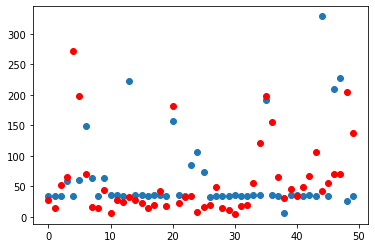

In [37]:
plt.scatter(list(range(50)), preds)
plt.scatter(list(range(50)), df[-50:, [0]], c = 'red')
plt.show()

In [35]:
np.array(list(zip(df[-50:, [0]], preds)))

array([[[ 28.       ],
        [ 34.018646 ]],

       [[ 14.       ],
        [ 34.018646 ]],

       [[ 52.       ],
        [ 34.018646 ]],

       [[ 66.       ],
        [ 59.1967   ]],

       [[272.       ],
        [ 34.018646 ]],

       [[199.       ],
        [ 59.764694 ]],

       [[ 70.       ],
        [149.49225  ]],

       [[ 16.       ],
        [ 63.09131  ]],

       [[ 14.       ],
        [ 34.018646 ]],

       [[ 45.       ],
        [ 63.09131  ]],

       [[  7.       ],
        [ 35.670036 ]],

       [[ 27.       ],
        [ 36.738205 ]],

       [[ 25.       ],
        [ 34.018646 ]],

       [[ 33.       ],
        [222.33987  ]],

       [[ 27.       ],
        [ 35.670036 ]],

       [[ 23.       ],
        [ 35.670036 ]],

       [[ 14.       ],
        [ 34.018646 ]],

       [[ 20.       ],
        [ 35.670036 ]],

       [[ 42.       ],
        [ 35.670036 ]],

       [[ 18.       ],
        [ 34.018646 ]],

       [[181.       ],
        [157.6614